World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications.

**THIS STUDY IS TO HELP YOU UNDERSTAND BASIC DATA ANALYSIS USING PYTHON**

*While understanding various health factors that are correlated to each other and lead to coronary heart disease , in this project emphasis has been made on coronary heart disease.*

NOTE: Dataset has been downloaded from kaggle datsets

In [1]:
# import pandas package 
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Read CSV file from local to framingham_df dataframe
framingham_df = pd.read_csv('/kaggle/input/framingham-heart-study/framingham_heart_disease.csv')

In [2]:
# Dataset's columns
framingham_df.columns

Index(['GENDER', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [3]:
framingham_df

,GENDER,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,Male,39,Doctorate,No,0.0,No,No,No,No,195.0,106.0,70.0,26.97,80.0,77.0,No
1,Female,46,Bachelors,No,0.0,No,No,No,No,250.0,121.0,81.0,28.73,95.0,76.0,No
2,Male,48,Associate,Yes,20.0,No,No,No,No,245.0,127.5,80.0,25.34,75.0,70.0,No
3,Female,61,Masters,Yes,30.0,No,No,Yes,No,225.0,150.0,95.0,28.58,65.0,103.0,Yes
4,Female,46,Masters,Yes,23.0,No,No,No,No,285.0,130.0,84.0,23.10,85.0,85.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,Male,50,Associate,Yes,1.0,No,No,Yes,No,313.0,179.0,92.0,25.97,66.0,86.0,Yes
4234,Male,51,Masters,Yes,43.0,No,No,No,No,207.0,126.5,80.0,19.71,65.0,68.0,No
4235,Female,48,Bachelors,Yes,20.0,NaN,No,No,No,248.0,131.0,72.0,22.00,84.0,86.0,No
4236,Female,44,Associate,Yes,15.0,No,No,No,No,210.0,126.5,87.0,19.16,86.0,NaN,No


In [4]:
#Shape of dataset

print ('No. of Rows :', framingham_df.shape[0], '\nNo. of Columns(Features) : ', framingham_df.shape[1])

No. of Rows : 4238 
No. of Columns(Features) :  16


In [5]:
# Datset's attribute info

framingham_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GENDER           4238 non-null   object 
 1   age              4238 non-null   int64  
 2   education        4133 non-null   object 
 3   currentSmoker    4238 non-null   object 
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   object 
 6   prevalentStroke  4238 non-null   object 
 7   prevalentHyp     4238 non-null   object 
 8   diabetes         4238 non-null   object 
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   object 
dtypes: float64(7), int64(1), object(8)
memory usage: 529.9+ KB


**Data Cleansing & Exploratory Data Analysis**

In [6]:
# Checking the null values for all columns
framingham_df.isnull().sum()

GENDER               0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [7]:
# percent null values for each field 
framingham_df.isnull().sum() / framingham_df.shape[0] * 100

GENDER             0.000000
age                0.000000
education          2.477584
currentSmoker      0.000000
cigsPerDay         0.684285
BPMeds             1.250590
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.179802
sysBP              0.000000
diaBP              0.000000
BMI                0.448325
heartRate          0.023596
glucose            9.155262
TenYearCHD         0.000000
dtype: float64

In [8]:
# removing null education values from records
framingham_df = framingham_df.dropna(subset=['education'])

In [9]:
framingham_df.isnull().sum()

GENDER               0
age                  0
education            0
currentSmoker        0
cigsPerDay          27
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             49
sysBP                0
diaBP                0
BMI                 18
heartRate            1
glucose            380
TenYearCHD           0
dtype: int64

In [10]:
# Lets handle missing values by imputing median value for fields "glucose, heartRate, totChol"

def impute_median(data):
    return data.fillna(data.median())

framingham_df.glucose = framingham_df['glucose'].transform(impute_median)
framingham_df.heartRate = framingham_df['heartRate'].transform(impute_median)
framingham_df.totChol = framingham_df['totChol'].transform(impute_median)
framingham_df.BMI = framingham_df['BMI'].transform(impute_median)

In [11]:
# Here fields are relation with other classes lets impute median for these values using group by classes 
# that are in relation with other classes

group_by_currentSmoker = framingham_df.groupby(['currentSmoker'])
framingham_df.cigsPerDay = group_by_currentSmoker['cigsPerDay'].transform(impute_median)

In [12]:
framingham_df.isnull().sum()

GENDER              0
age                 0
education           0
currentSmoker       0
cigsPerDay          0
BPMeds             53
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol             0
sysBP               0
diaBP               0
BMI                 0
heartRate           0
glucose             0
TenYearCHD          0
dtype: int64

In [13]:
#Shape of dataset

print ('No. of Rows :', framingham_df.shape[0], '\nNo. of Columns(Features) : ', framingham_df.shape[1])

No. of Rows : 4133 
No. of Columns(Features) :  16


Pearson Correlation

<AxesSubplot:>

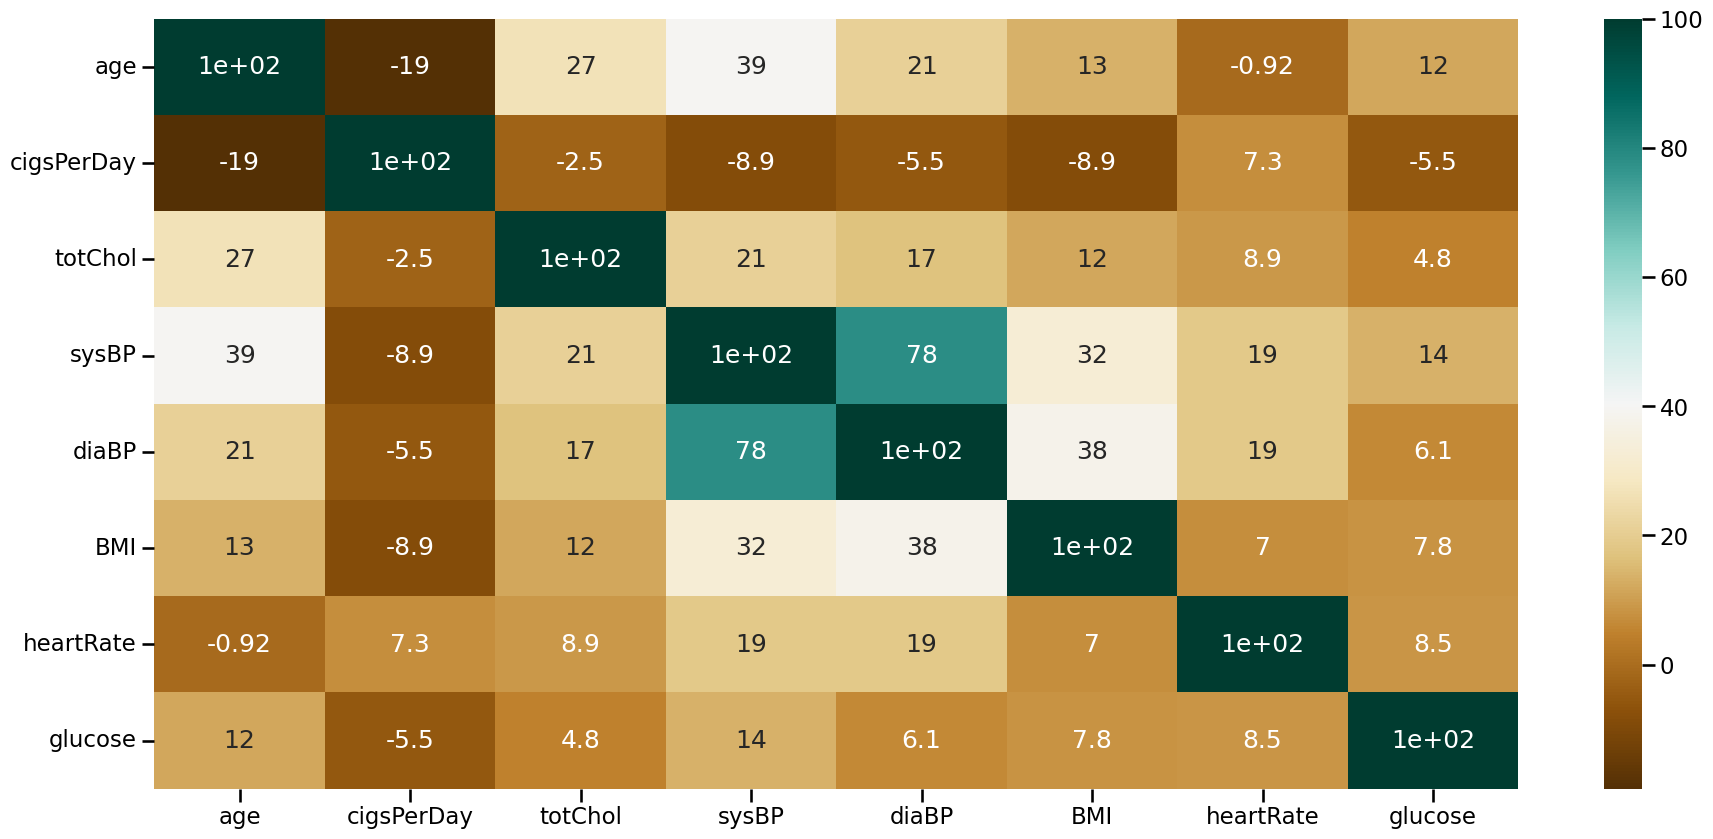

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('talk')
plt.figure(figsize=(22,10))
sns.heatmap(framingham_df.corr()*100, annot=True, cmap='BrBG')

**Observations :**
1. Correlation plot gives us valuable information regarding Relation within Attributes. It can Either be Negative or Positive or Nill. We need to always keep 1 feature from 2 Strongly Correlated ones.
2. Blood pressure and BMI has strong Correlation of 38 (Scaled for better Observations)
3. glucose and cigars per day have negative correlation
4. While, glucose & diabetes are postively Correlated.
5. sysBP & diaBP are also having Positive Correlation.
6. age and cholestrol also show a postive correlation here

In [15]:
# data summary
framingham_df.describe()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000
mean,49.557222,9.101621,236.628841,132.367046,82.872248,25.776835,75.922574,81.578756
std,8.561628,11.918440,43.910117,22.080332,11.952654,4.074444,12.048177,22.889300
min,32.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000
25%,42.000000,0.000000,206.000000,117.000000,75.000000,23.060000,68.000000,72.000000
50%,49.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000
75%,56.000000,20.000000,262.000000,144.000000,89.500000,27.990000,83.000000,85.000000
max,70.000000,70.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000


(Chronic Heart Disease) CHD by Gender

Text(0.5, 1.0, 'Distribution of HeartRate')

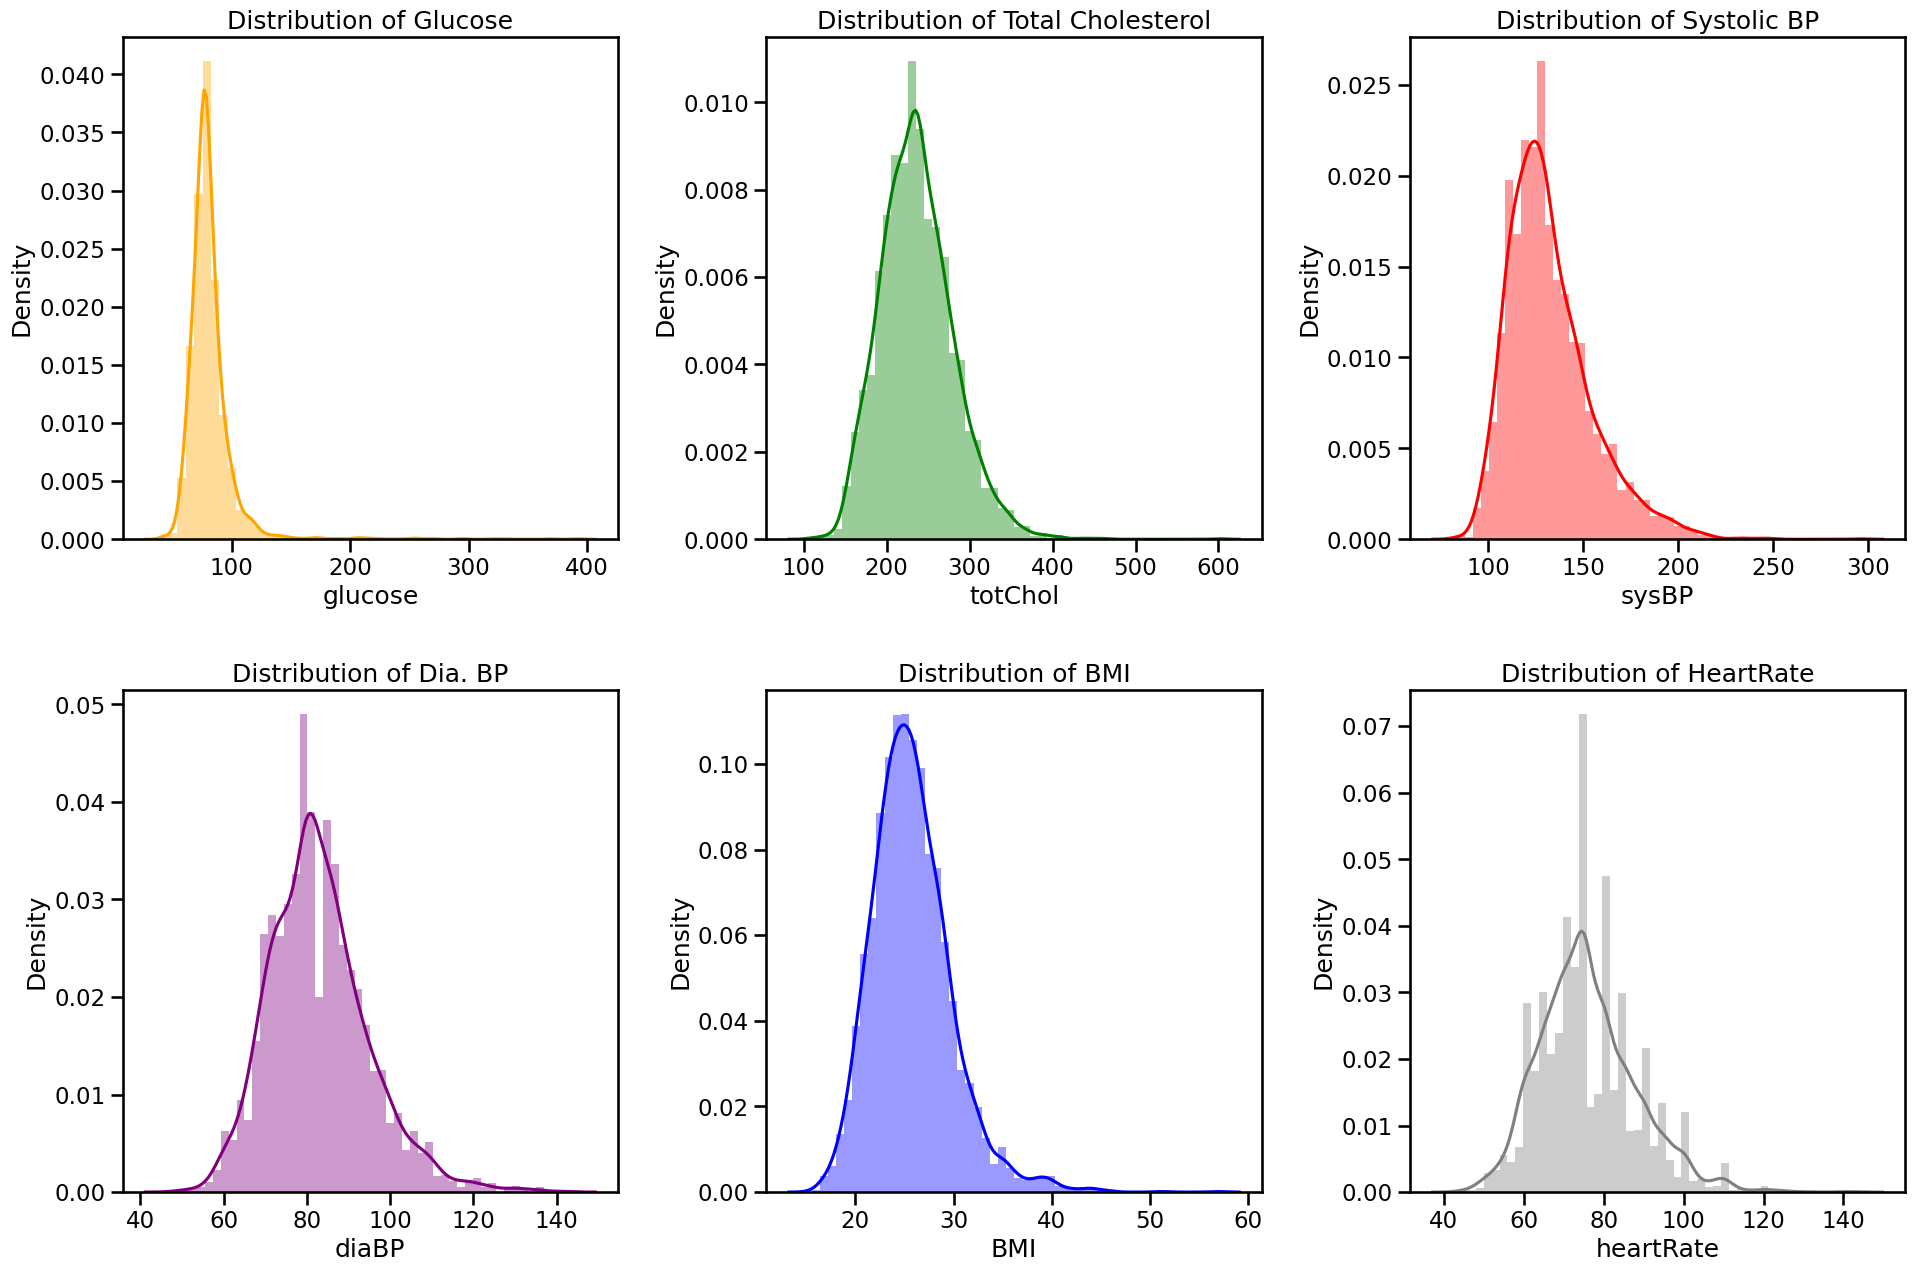

In [16]:
plt.figure(figsize=(23,15))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.subplot(2, 3, 1)
sns.distplot(framingham_df['glucose'] , color='orange')
plt.title('Distribution of Glucose')

plt.subplot(2, 3, 2)
sns.distplot(framingham_df['totChol'], color='g')
plt.title('Distribution of Total Cholesterol')

plt.subplot(2, 3, 3)
sns.distplot(framingham_df['sysBP'], color='r')
plt.title('Distribution of Systolic BP')

plt.subplot(2, 3, 4)
sns.distplot(framingham_df['diaBP'] , color='purple')
plt.title('Distribution of Dia. BP')

plt.subplot(2, 3, 5)
sns.distplot(framingham_df['BMI'], color='blue')
plt.title('Distribution of BMI')

plt.subplot(2, 3, 6)
sns.distplot(framingham_df['heartRate'], color='grey')
plt.title('Distribution of HeartRate')

**Observations :**
- We can see Glucose, Total Cholesterol, Systolic BP & BMI is Right Skewed.
- While Diastolic BP & Heart Rate are close to Normal / Gaussian Distribution.

Agewise distribution of the patients

Text(0.5, 1.0, 'Agewise distribution of the patients')

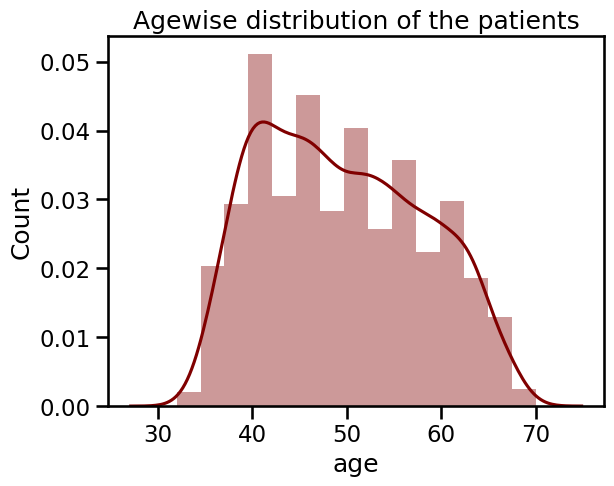

In [17]:
sns.distplot(framingham_df['age'], bins=15, kde=True, color='maroon')
plt.ylabel('Count')
plt.title('Agewise distribution of the patients')

We can observe that Subject with Normal HeartRate are in Majority followed by Resting / Low HeartRate and High HeartRate.
We've more number of Middle-Aged Adults in our Dataset followed by Seniors And then Adults.

In [18]:
def encode_age(data):
    if data <= 40:
        return 0
    if data > 40 and data <=55:
        return 1
    else:
        return 2 
    
def heartrate_enc(data):
    if data <= 60:
        return 0
    if data > 60 and data <=100:
        return 1
    else:
        return 2
    
framingham_df['enc_hr'] = framingham_df['heartRate'].apply(heartrate_enc)
framingham_df['encode_age'] = framingham_df['age'].apply(lambda x : encode_age(x))

Text(0.5, 1.0, 'Count by Age Group')

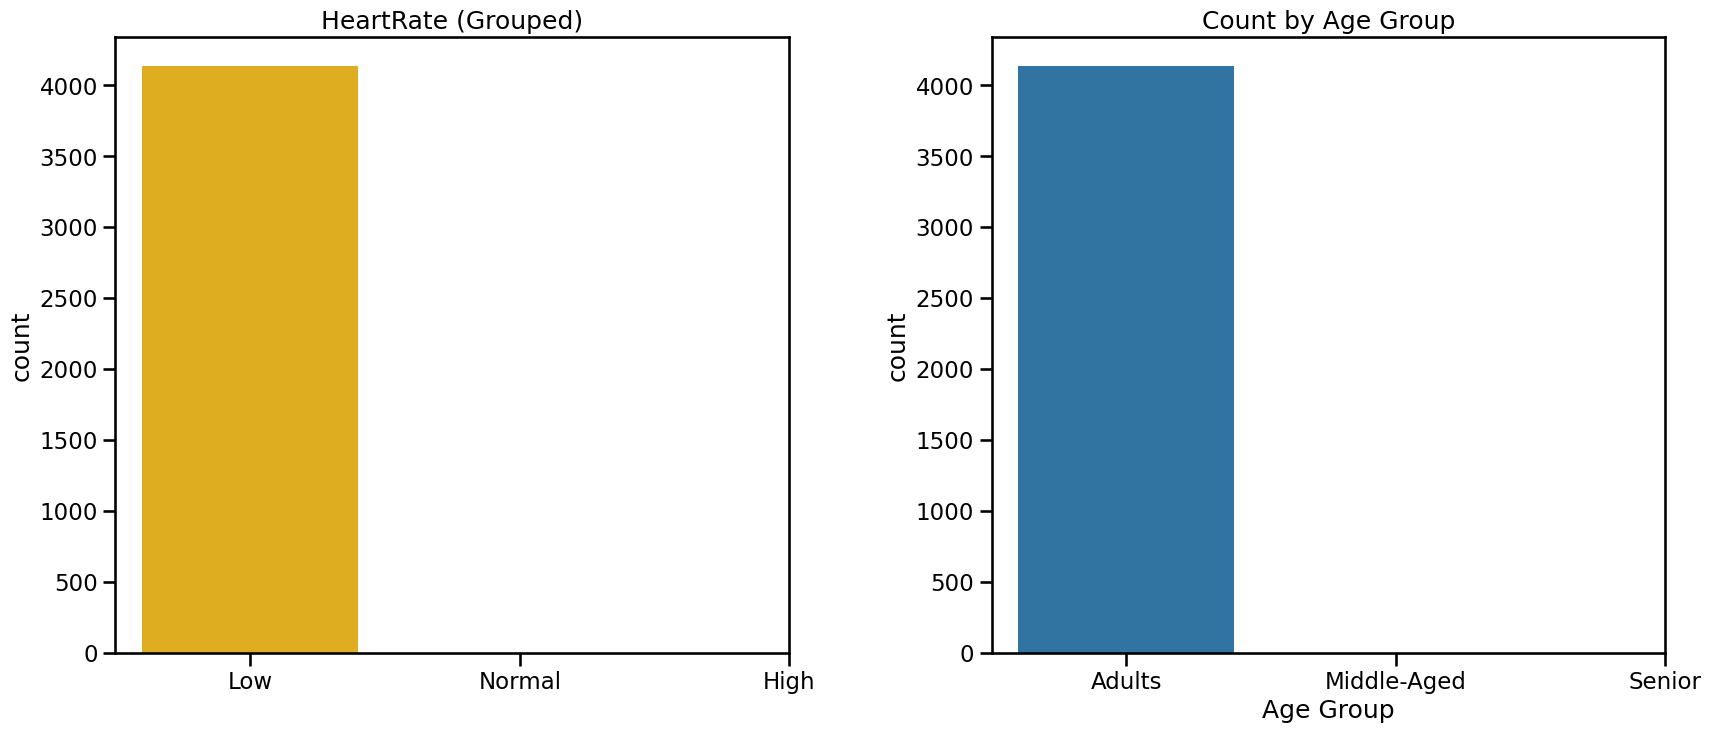

In [19]:
plt.figure(figsize=(20,8))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.subplot(1, 2, 1)
sns.countplot(framingham_df['enc_hr'], palette='Wistia')
plt.title('HeartRate (Grouped)')
plt.xticks([0,1,2], ['Low', 'Normal', 'High'])

plt.subplot(1, 2, 2)
sns.countplot(framingham_df['encode_age'])
plt.xlabel('Age Group')
plt.xticks(ticks=[0,1,2], labels=['Adults', 'Middle-Aged', 'Senior'])
plt.title('Count by Age Group')

We can observe that Subject with Low HeartRate are in Majority.

We've more number of Adults in our Dataset.

**Multivariate Analysis**

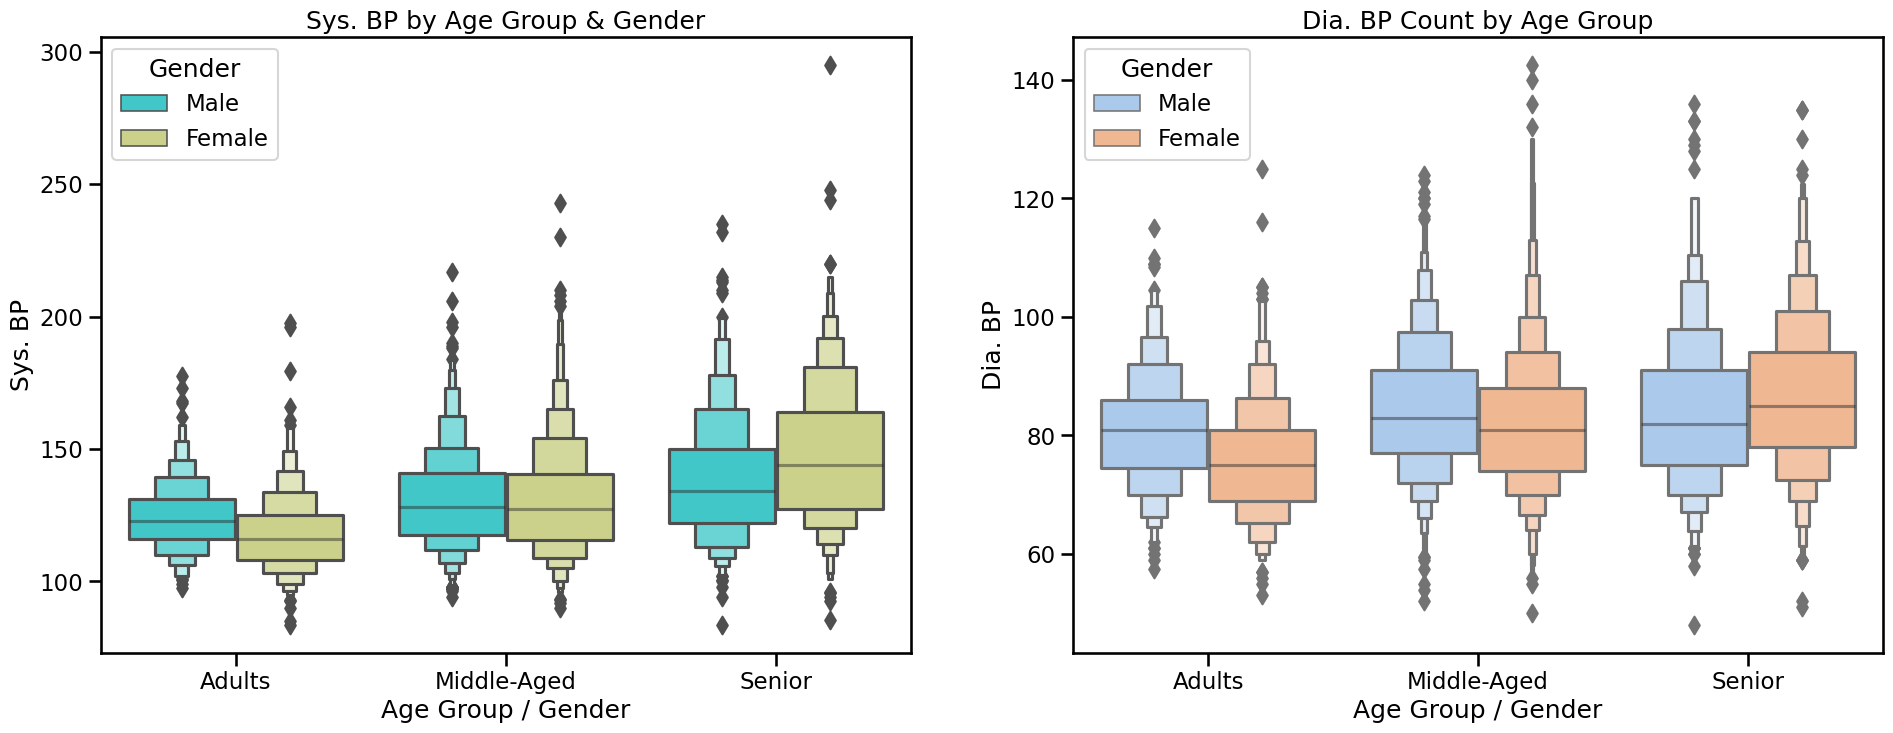

In [20]:
plt.figure(figsize=(23,8))
plt.subplots_adjust(wspace=0.2, hspace=0.3)

plt.subplot(1, 2, 1)
sns.boxenplot(x='encode_age', y='sysBP', hue='GENDER', data=framingham_df, palette='rainbow')
plt.xlabel('Age Group / Gender')
plt.ylabel('Sys. BP')
plt.xticks(ticks=[0,1,2], labels=['Adults', 'Middle-Aged', 'Senior'])
plt.title('Sys. BP by Age Group & Gender')
plt.legend(title='Gender')

plt.subplot(1, 2, 2)
sns.boxenplot(x='encode_age', y='diaBP', hue='GENDER', data=framingham_df, palette='pastel')
plt.xlabel('Age Group / Gender')
plt.ylabel('Dia. BP')
plt.xticks(ticks=[0,1,2], labels=['Adults', 'Middle-Aged', 'Senior'])
plt.title('Dia. BP Count by Age Group')
plt.legend(title='Gender')

Observations :
1. Sys. BP by Age Group & Gender : Sys. BP is Increasing by Age Group and Gender.
2. Dia. BP by Age Group & Gender : Similar to Sys. BP , the Dia. BP is seen Increasing by Age Group & Gender.

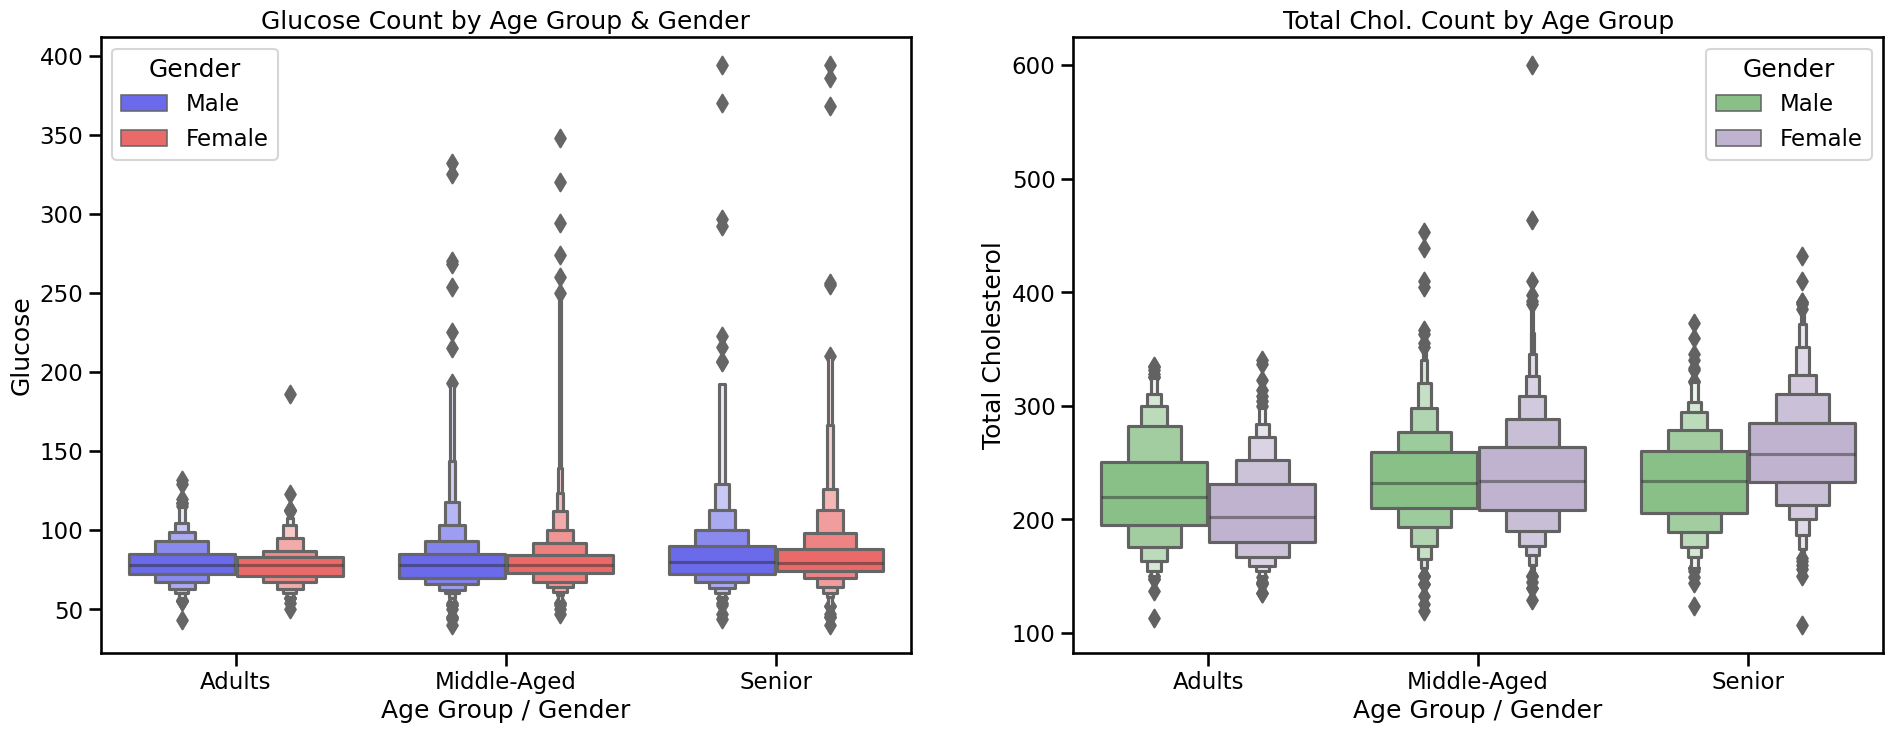

In [21]:
plt.figure(figsize=(23,8))
plt.subplots_adjust(wspace=0.2, hspace=0.3)

plt.subplot(1, 2, 1)
sns.boxenplot(x='encode_age', y='glucose', hue='GENDER', data=framingham_df, palette='seismic')
plt.xlabel('Age Group / Gender')
plt.ylabel('Glucose')
plt.xticks(ticks=[0,1,2], labels=['Adults', 'Middle-Aged', 'Senior'])
plt.title('Glucose Count by Age Group & Gender')
plt.legend(title='Gender')

plt.subplot(1, 2, 2)
sns.boxenplot(x='encode_age', y='totChol', hue='GENDER', data=framingham_df, palette='Accent')
plt.xlabel('Age Group / Gender')
plt.ylabel('Total Cholesterol')
plt.xticks(ticks=[0,1,2], labels=['Adults', 'Middle-Aged', 'Senior'])
plt.title('Total Chol. Count by Age Group')
plt.legend(title='Gender')

Observations :
Glucose Count by Age Group & Gender : 
1. We can clearly observe that as Age increases the count of Glucose increases too. 
2. While Gender wise Glucose Count has almost similiar Median with Few outliers in each.

**Violin Plot of Cigsperday by age group**

Text(0.5, 1.0, 'Cigs. per day by Age Group')

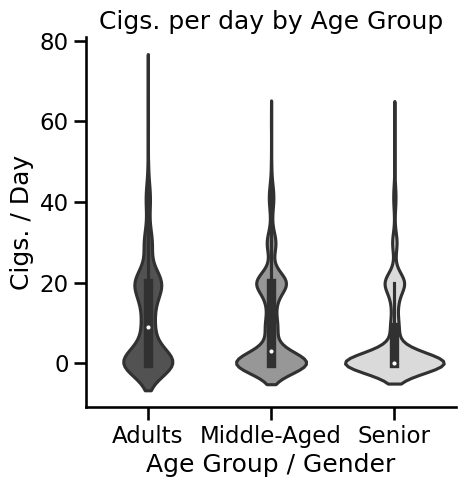

In [22]:
sns.catplot(data=framingham_df, x='encode_age', y='cigsPerDay', kind='violin', size=7, palette='Greys_r')
plt.xlabel('Age Group / Gender')
plt.ylabel('Cigs. / Day')
plt.xticks(ticks=[0,1,2], labels=['Adults', 'Middle-Aged', 'Senior'])
plt.title('Cigs. per day by Age Group')

Observation :
- Adults : In Adults we can observe that Median values has Lower Kernel Density followed by 75% IQR's Density. While, 25% IQR marks the Higher Kernel Density.
Middle-Aged : In Middle-Aged Group we can observe that 25% IQR & Median has Higher Kernel Density while 75% IQR has a quite Lower Kernel Density.
- Senior : In Seniority section we can observe that Median and 25% IQR are Closely Intact to each other having Higher Kernel Density, while 75% IQR got Lower Kernel Density.

**Target Class count**

Text(0.5, 1.0, 'Target Class Count')

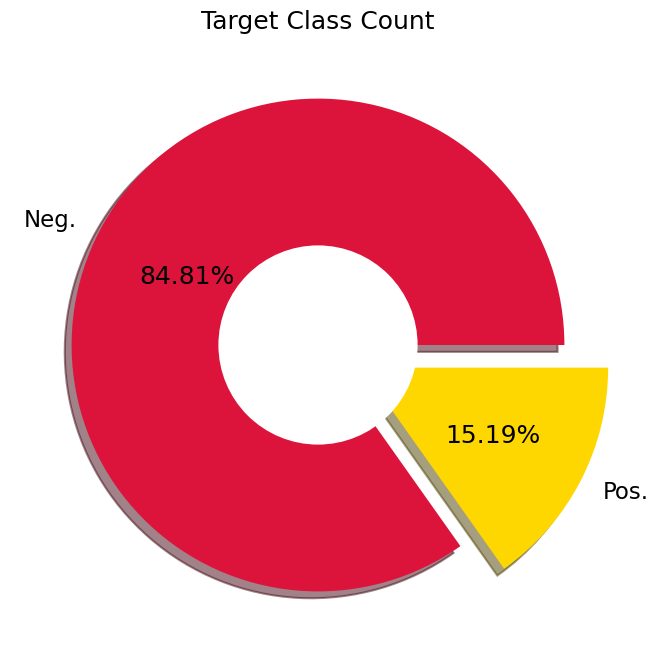

In [23]:
plt.figure(figsize=(8,8))
plt.pie(framingham_df['TenYearCHD'].value_counts(), labels=['Neg.','Pos.'], autopct='%1.2f%%', explode=[0,0.2], shadow=True, colors=['crimson','gold'])
my_circle = plt.Circle( (0,0), 0.4, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Target Class Count')

Observations :
- We can see that we've Imbalanced Dataset here having ratio of 85:15 where Positive Class is Minor.
- We'll need to Over-sample the Dataset in this case to get the best out of it.
- But before we proceed with Over-Sampling we'll First try Basic Logistic Regression Model on Data we had processed.

**Model Evaluation and Testing**

**Target variable :** TenYearCHD

**feature variables :** Cigsperday,  Totchol,  DiaBP, BMI, heartrate, glucose, age


In [24]:
framingham_df_copy = framingham_df.copy()

In [25]:
import numpy as np
framingham_df_copy['log_cigsPerDay'] = np.log1p(framingham_df_copy['cigsPerDay'])
framingham_df_copy['log_totChol'] = np.log1p(framingham_df_copy['totChol'])
framingham_df_copy['log_diaBP'] = np.log1p(framingham_df_copy['diaBP'])
framingham_df_copy['log_BMI'] = np.log1p(framingham_df_copy['BMI'])
framingham_df_copy['log_heartRate'] = np.log1p(framingham_df_copy['heartRate'])
framingham_df_copy['log_glucose'] = np.log1p(framingham_df_copy['glucose'])
framingham_df_copy['log_age'] = np.log1p(framingham_df_copy['age'])

In [26]:
framingham_df_copy.drop(['GENDER','cigsPerDay', 'totChol', 'sysBP','heartRate','age', 'diaBP', 'BMI', 'glucose',
                         'currentSmoker', 'education', 'BPMeds', 'prevalentStroke','prevalentHyp', 'diabetes', 'enc_hr', 'encode_age'], axis=1, inplace=True)

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()

In [29]:
cols = framingham_df_copy.drop(['TenYearCHD'], axis=1).columns

norm_df = scaler.fit_transform(framingham_df_copy.drop(['TenYearCHD'], axis=1))
norm_df = pd.DataFrame(data=norm_df, columns=cols, index=framingham_df_copy.drop(['TenYearCHD'], axis=1).index)                     
norm_df.head()

,log_cigsPerDay,log_totChol,log_diaBP,log_BMI,log_heartRate,log_glucose,log_age
0,-0.929968,-0.959845,-1.123666,0.371765,0.413080,-0.178055,-1.295289
1,-0.929968,0.390300,-0.091345,0.787522,1.516932,-0.244805,-0.345210
2,1.140740,0.280464,-0.179284,-0.037313,-0.000889,-0.664467,-0.099704
3,1.405632,-0.182415,1.038370,0.753061,-0.917491,1.310124,1.286602
4,1.231561,1.102873,0.166177,-0.642831,0.802244,0.327028,-0.345210


In [30]:
#train-test split
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc

x = norm_df
y = framingham_df_copy['TenYearCHD']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=23)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3099, 7), (1034, 7), (3099,), (1034,))

**Logistic Regression**

In [31]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

log_pred = log_reg.predict(x_test)
log_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

Accuracy Score : 0.8433268858800773
Cross Validation Score :  0.851564959091146
              precision    recall  f1-score   support

          No       0.84      1.00      0.91       869
         Yes       0.80      0.02      0.05       165

    accuracy                           0.84      1034
   macro avg       0.82      0.51      0.48      1034
weighted avg       0.84      0.84      0.78      1034



<AxesSubplot:>

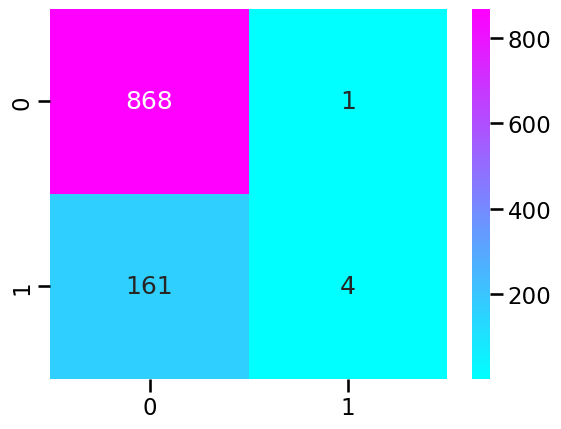

In [32]:
# Metrics Evaluation

print ('Accuracy Score :', accuracy_score(y_test, log_pred))
print ('Cross Validation Score : ', cross_val_score(log_reg, x_train, y_train, cv=5).mean())
print (classification_report(y_test, log_pred))

sns.heatmap(confusion_matrix(y_test, log_pred), annot=True, cmap='cool', fmt='d')

The accuracy score has come out as  : 83.4%

Cross Validation score : 85.8%

This shows that model predicts the risk of heart disease for the feature variables  83.4% correctly.
